# Selenium Setup

This notebook explains how to configure and test `selenium` to run within a container. 

*1-* Docker Image:<br>
The Image used is `infologistix/docker-selenium-python:3.10` that comes with everything configured for Selenium to run in `Headless` mode. In `Headless` mode the browser does not open at al. That's good for script automation, however it's difficult for development purposes. 

*2-* Chromium: <br>
The aforementioned image comes with `Chromium`. We will later decide if `google-chrome` should be installed instead.

*3-* X11 Server: <br>
To open selenium in normal mode (`not headless`) we need to point the DISPLAY variable to the localhost's IP. In addition, it's necessary to run a X Server on windows. Here, we opted for `VcXsrv`, for the sake of simplicity.

*Example: One can test if X11 is working by running simple X11 apps, like `xclock`. As mentioned, the DISPLAY variable must point to the `ip address:display number`. In this case, if we are running from within a docker container, our target `ip` will be the host's `ip`. Docker sets up automatically an internal domain name that points to the host, it's called `host.docker.internal`. That's the trick, because if we try to open `localhost`, it will point to the container's `ip`.

To test:
```
set DISPLAY=host.docker.internal:0
xclock
```

SO let's get started.


## Testing Selenium env - HEADLESS

First, we are going to test Selenium in `headless` mode. Normally we should not have any difficulties. 
We are going to open a simple page and take a screenshot just to check everything is working fine. 

In [2]:
%load_ext autoreload
%autoreload 2
import os
from IPython.display import Image

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

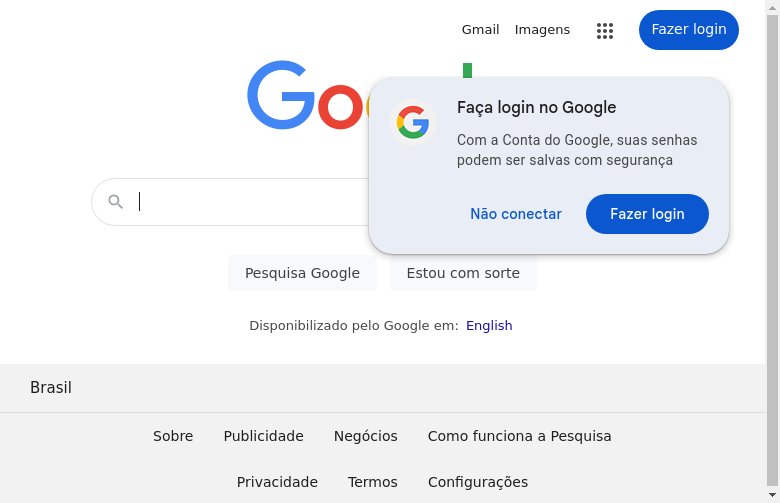

In [23]:
# Testing Selenium environment
chrome_options = Options()
chrome_options.add_argument("--headless=new")  # Run Chrome in headless mode
chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

# Create a new instance of the Chrome driver
driver = webdriver.Chrome(options=chrome_options)

# Get a page
driver.get("http://www.google.com")


# Save it to a temp file and displays it
filename = './tmp/temp.png'
driver.save_screenshot(filename)
img = Image(filename)

# Close the driver and cleans up the temp file
os.remove(filename)
driver.close()

img

## Testing Selenium env - FULL Browser

First, we need to understand that the Docker environment, does not have displaying capabilities. So, in order to open the application window, we will use a XServer running in the host computer. For simplicity we will use the `VcXsrv` application running on display 0. Normally, the port used is 6000 + display no. So, if we configure the XServer to display 22, the used port will be 6022. 

That doesn't matter for the moment, as the ports are not having any influence here, but we need to setup the `DISPLAY` environment variable to `DISPLAY=host ip:display number`

Here is the trick. We need to make sure to do that in the Jupyter Notebook, not the bash. Another trick is to retrieve the correct IP Address. We can get the host IP by using `ipconfig` on host, instead Docker Engine (that manages the Docker internal network) provides a DNS name called `host.docker.internal` that points to the host machine. We can then use this to point correctly to our host. 

In [6]:
os.environ['DISPLAY'] = 'host.docker.internal:0'

In [8]:
# Testing Selenium environment
options = Options()
# options.add_argument("--headless=new")  # Run Chrome in headless mode
options.add_argument("--no-sandbox")  # Bypass OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
options.add_argument("--window-size=800,600")
# options.add_argument("--disable-gpu")  # Disable GPU acceleration

# Set the DISPLAY variable for Chrome (you can pass it directly in Python if needed)
# options.add_argument(f"--display={os.environ['DISPLAY']}")


# options.add_argument("--host=localhost")  # or your local machine's IP address
# options.add_argument("--port=6000")  # or the port number you want to use
# options.binary_location = "/C/Program Files/Google/Chrome/chrome.exe'"


driver = webdriver.Chrome(options=options)


driver.get("https://br.financas.yahoo.com/quote/TRPL4.SA/")


In [11]:
driver.find_element(By.XPATH, '//*[@id="Col2-9-QuoteModule-Proxy"]/div/section/div/div/div[1]').text

'3.5'

## Testing SeleniumPage class

In [4]:
from dashboards.selenium_utils import SeleniumPage

In [6]:
# Create a new instance of SeleniumPage with the provided parameters
page = SeleniumPage(
    url="https://www.example.com",
    implicit_wait_seconds=30,
    window_size="1024,768",
    headless=False
)

In [8]:
page._driver.page_source

'<html><head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8">\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <h1>Example Domain</h1>\n 